# Homework 4

## Question Ideas

- Dimensionality Reduction
    - Data with some _true_ underlying dimensionality, can the students recover the true dimensionality of the data? 
    

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA, NMF

## Question 0. Getting Data

**For this part there is nothing to implement**

However, please review the documentation for [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) and [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to see what these functions do.  Here is more information on the [dataset](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html).


Recall that for dimensionality reduction we form the matrix
$$
{\bf X} = [{\bf x}_1; {\bf x}_2; \ldots; {\bf x}_N] \in \mathbb{R}^{d\times N}
$$
where ${\bf x}_i \in \mathbb{R}^d$ is the dimension of the data and $N$ is the number of training points.  We want to find a **dictionary** matrix ${\bf W}$ and a **code** matrix ${\bf Z}$ such that ${\bf X} \approx {\bf WZ}$.  Dimensionality reduction comes in when we select ${\bf W} \in \mathbb{R}^{d \times q}$ and ${\bf Z} \in \mathbb{R}^{q\times N}$ with $q \ll d$.

In [55]:
# Load in the data.
newsgroups_train = datasets.fetch_20newsgroups(subset='train', 
                                               categories=['comp.sys.mac.hardware', 'rec.motorcycles', 'sci.med', 'soc.religion.christian'])

tfidf_vectorizer = TfidfVectorizer(min_df = 30)

# The data matrix X and the targets y.
X = (tfidf_vectorizer.fit_transform(newsgroups_train.data).T).todense()
y = newsgroups_train.target

(d, N) = X.shape
print("X has shape (d, N) = ", X.shape)

# The reduced dimension.
q = 5

X has shape (d, N) =  (1771, 2369)


## Question 1. Training with PCA

### Part (a)

Using the PCA implemented in Sci-Kit learn, obtain the low-dimensional projection of ${\bf X}$ (i.e. get ${\bf W}$ and ${\bf Z}$) for when $q = 5$.  Read the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) carefully.  In particular, make sure you are computing the correct ${\bf W}$ and ${\bf Z}$.

In [186]:
# TO DO STARTS HERE ##
scaler = StandardScaler(with_std = False)
scaler.fit(X)
X = scaler.transform(X)
model = PCA(n_components=q)
Z = model.fit_transform(X.T).T
W = model.components_.T

## TO DO ENDS HERE ##

print("W has shape ", W.shape)
print("Z has shape ", Z.shape)


W has shape  (1771, 5)
Z has shape  (5, 2369)


### Part (b)

The matrix ${\bf Z} = [{\bf z}_1,\ldots,{\bf z}_N]$ is the matrix of the reduced data.  Make a scatter plot of the data projected onto its first two principal components.  In other words, form a scatter plot of all the ${\bf z}_i$ with the first component as the $x$-axis and the second component as the $y$-axis.  Set the color bar so that the points are colored corresponding to their target label ${\bf y}$ (which was defined earlier in the code).

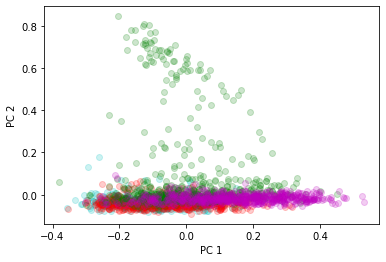

COMPONENT 1
not we in god is and to that of the

COMPONENT 2
n3jxp chastity cadre shameful dsl cs gordon banks geb pitt

COMPONENT 3
not hell christians faith that his jesus he we god

COMPONENT 4
uga georgia god ai of apple university mac edu the

COMPONENT 5
msg if can have it is apple mac you to



In [187]:
#TO DO STARTS HERE ##
pc1 = Z[0,:]
pc2 = Z[1,:]
pc3 = Z[2, :]


color = ['c', 'r', 'g', 'm']
for ind, col in zip(inds, color):
    plt.scatter(pc1[ind], pc2[ind], c=col, alpha = .2)
    
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()


## TO DO ENDS HERE ##

# Also print out the first q components.  There is nothing to do for this part.
loadings = vec.T
invocab = dict([(vv,kk) for kk, vv in tfidf_vectorizer.vocabulary_.items()])

for i in range(q):
    insens_idx = np.argsort(loadings[i])

    print ('COMPONENT ' + str(i + 1))
    print (' '.join([invocab[w_ix] for w_ix in insens_idx[-10:]]) + '\n')

### Part (c)

Recall that for PCA the dictionary and code matrices ${\bf W},{\bf Z}$ can be found using either an eigenvalue decomposition or the SVD.  Suppose the matrix ${\bf X}$ is centered so that 
$$
\frac{1}{N}\sum_{i = 1}^N {\bf x}_i = \vec{0} \in \mathbb{R}^d
$$
The covariance matrix is defined to be ${\bf C} = {\bf XX}^T$.  The eigen-decomposition of ${\bf C} = {\bf W\Sigma W}^T$ gives the matrices ${\bf W}$ and ${\bf Z} = {\bf \Sigma W}^T$.  Here
$$
{\bf \Sigma} = \begin{bmatrix}
\sigma_1^2 & & \\
 & \ddots & \\
 & & \sigma_d^2
\end{bmatrix}
$$
is the diagonal matrix with eigenvalues $\sigma_i^2$.  The proportion of explained variance by our low-dimensional projection is defined to be
$$
\mathrm{PV}(q) := \frac{\sum_{i=1}^q \sigma_i^2}{\sum_{i=1}^d \sigma_i^2}
$$
Make a plot of $\mathrm{PV}(q)$ versus $q$ for $q = 1,\ldots,1000$.  For this you do not need to implement the procedure above on your own, but can instead use the Sci-kit learn PCA.  In particular, look at the `explained_variance_ratio_` attribute.  Make sure that your plot is clear with a title and labeled axes.

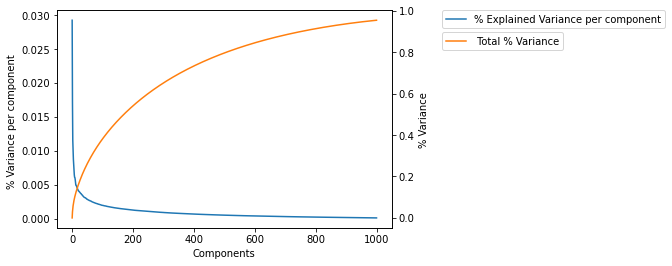

In [189]:
## TO DO STARTS HERE ##
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ncomp = 1000
model = PCA(n_components = ncomp)
model.fit(X.T)
var = model.explained_variance_ratio_
#plt.title("Explained Variance Ratio v.  # Components")
ax1.plot(range(ncomp),var, label="% Explained Variance per component")
ax2.plot(range(ncomp), [sum(var[:i]) for i in range(ncomp)], c='tab:orange', label=" Total % Variance")
ax1.legend(bbox_to_anchor=(1.15, 1), loc='upper left', borderaxespad=0.)
ax2.legend(bbox_to_anchor=(1.15, .90), loc='upper left', borderaxespad=0.)
ax1.set_xlabel("Components")
ax1.set_ylabel("% Variance per component ")


ax2.set_ylabel("% Variance")


plt.show()

## TO DO ENDS HERE ##

## Question 2.  Interpreting the principal components

Consider the dataset
$$
{\bf X} = [{\bf x}_1; {\bf x}_2; {\bf x}_3] = \begin{bmatrix}
1 & 2 & 3\\
1 & 2 & 3
\end{bmatrix}
$$
Although this data is 2-dimensional, it actually lives on the 1 dimensional line $x_1 = x_2$.  Without doing any computation, answer the following with short explanations:

1.  What is the first principal component (i.e. first eigenvector)?  

2.  What is the second principal component?

3.  What is the proportion of variance explained by only the first principal component?

4.  What are the matrices ${\bf W}, {\bf Z}$ when $q = 1$?  Normalize the columns of ${\bf W}$ to have unit norm.

**Answer goes here**

1. The first principle component eigenvector is $\begin{pmatrix} 1\\ 1\\ \end{pmatrix}$ because all of the data lies on the line x1 = x2 thereore this line comprises the axis of maximal variance 
2. The second principal component is the line orthogonal to the first component, ie. $\begin{pmatrix} 1 \\ -1 \end{pmatrix}$. The data when projected on to this component all gets mapped to a single point. 
3. 100%. Everything lies on the line of the first principal component.
4. $$  w_1 = \begin{pmatrix} .70\\ .70 \end{pmatrix},  z = X^Tw_1 = \begin{pmatrix} 1.41\\2.82\\4.24\end{pmatrix}  $$

Additional Computations to Verify

In [71]:
w = np.array([1,1]).reshape(-1, 1)
X = np.array([[1,2,3],[1,2,3]])

In [77]:
w.shape, X.shape

((2, 1), (2, 3))

In [84]:
pc1 =w/np.sqrt(w.T@w)

In [89]:
pc1

array([[0.70710678],
       [0.70710678]])

In [86]:
pc1.shape, X.shape

((2, 1), (2, 3))

In [90]:
X.T @ pc1

array([[1.41421356],
       [2.82842712],
       [4.24264069]])

In [72]:
np.linalg.eig(X@X.T)

(array([28.,  0.]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

## Question 3: Finding True Dimensionality

I generated $N$ observations of $q$ dimensional data according to the following procedure

$$
\begin{align}
z_n &\sim N(0, I_{q})\\
X_n &= Wz_n + \epsilon
\end{align}
$$
where $\epsilon \sim N(d, \sigma^2I_{d})$ and $\epsilon$, $W \in \mathbb{R}^{d \times q}$, and $\mu \in \mathbb{R}^q$ are fixed.

More simply - we have created a simple dataset containing $N$ obersevations of $d=33$ dimensional observations stored in an $N \times d$ array saved as `X.npy`.

Your task is to give your best estimate for $q$, that is, what do you think is the _true_ dimensionality of the data? Then, using your best guess for $q$, report the percent of the variance in $X$ you can explain using just $q$ dimensions.

In [190]:
X = np.load("X.npy")
X.shape

(500, 33)

### Part A: PCA and Cross Validation

Use PCA with Leave-One-Out cross validation to chose a value for $q$. You should use the SciKit-Learn implementation of PCA with the `pca.score` function to compute the log-likelihood of the heldout sample for each validation fold.

Explicitly state your choice of $q$ and generate the PCA embeddings of $X$ in your $q$ dimensional space. What percent of the variability in `X` can you explain with just `q` dimensions?

**Answer Here**

In [202]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [203]:
X.shape

(500, 33)

In [205]:
n_sample, n_dim = X.shape[0], X.shape[1]

In [204]:
loo = LeaveOneOut() 

In [206]:
%%time
model = PCA()
scores = []
for i in range(n_dim):
    model.n_components =  i
    scores.append(np.mean(cross_val_score(model, X, cv = loo.split(X), n_jobs=-1)))
    

Wall time: 5.11 s


In [207]:
best_fit = np.argmax(scores)
best_comp = best_fit +1

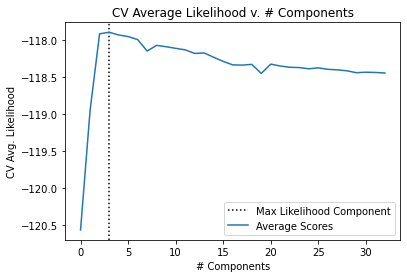

In [208]:
plt.title("CV Average Likelihood v. # Components")
plt.axvline(best_fit, ls = ":", c='k', label='Max Likelihood Component')
plt.plot(scores, label='Average Scores')
plt.xlabel("# Components")
plt.ylabel("CV Avg. Likelihood")
plt.legend(loc = 'lower right')
plt.show()

In [209]:
model = PCA(n_components = best_comp)
X_trans = model.fit_transform(X)
var_exp = sum(model.explained_variance_ratio_)
print(f'Variability Explained With {best_comp} Components: {round(var_exp * 100,2)}%')


Variability Explained With 4 Components: 36.1%


In [210]:
comp = model.components_[:2]


### Part B: K-Means

Now that you have your PCA embeddings in a $q$ dimensional space, choose an appropriate number of clusters and implement k-means to form predictions. 

Once you have clustered the data produce a scatter-plot of the clusters in the first two dimesions of your embeddings where the color of the points represents the cluster assignment. On this plot also include the cluster centers generated by k-means.

**Answer Here**

In [211]:
from sklearn.cluster import KMeans

In [217]:
cluster = KMeans(n_clusters = best_comp)
group = cluster.fit_predict(X)
centers = cluster.cluster_centers_
proj_centers = centers@comp.T

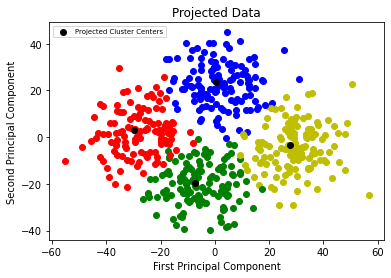

In [218]:
pc1 = X_trans[:,0]
pc2 = X_trans[:, 1]
colors = ['r', 'b', 'g', 'y' ]
for i in range(len(group)):
    col = colors[group[i]]
    plt.scatter(pc1[i], pc2[i], c=col)
plt.title("Projected Data")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.scatter(proj_centers[:,0], proj_centers[:, 1], c='k', label='Projected Cluster Centers')
plt.legend(loc = 'upper left', fontsize='x-small')
plt.show()

## Question 4: Evidence Lower Bound

For a given joint probability distribution $p(\mathbf{X},\mathbf{Z}\mid\theta)$ of the data $\mathbf{X}$ and underlying latent variables $\mathbf{Z}$, parametrized by some parameters $\theta$ show that we can decompose the marginal likelihood of data as

$$
\log{p(\mathbf{X}\mid\theta)} = \underbrace{\mathbb{E}_q[\log{p(\mathbf{X},\mathbf{Z}\mid\theta)} - \log{q(\mathbf{Z})}]}_{\mathcal{L}(q,\theta)} + \mathrm{KL}(q(\mathbf{Z}) \mid\mid  p(\mathbf{Z}\mid\mathbf{X},\theta))
$$

where $q(\mathbf{Z})$ is an approximation of the true posterior $p(\mathbf{Z}\mid\mathbf{X},\theta)$. Therefore, argue why $\mathcal{L}(q,\theta)$ is a lower bound on the $\log$-marginal likelihood of the data. When will $\mathcal{L}(q,\theta)$ equal $\log{\mathbf{p(\mathbf{X}\mid\theta)}}$?

**Answer Here**

$$ \log p(\mathbf{X}| \theta) = \mathbb{E}_q[\log p(\mathbf{X}| \theta)]$$
From bayes rule we have that, 
$$p(\mathbf{X}) = \frac{p(\mathbf{X, Z})}{p(\mathbf{Z|X})}$$
so, 
$$= \mathbb{E}_q[\log\frac{p(\mathbf{X, Z}| \theta)}{p(\mathbf{Z}|\mathbf{X},\theta)}]$$
and multiplying by $1 = \frac{q(\mathbf{Z})}{ q(\mathbf{Z})}$
$$= \mathbb{E}_q[\log(\frac{p(\mathbf{X, Z}| \theta)}{q(\mathbf{Z})}\frac{q(\mathbf{Z})}{p(\mathbf{Z}|\mathbf{X},\theta)})]$$
$$\mathbb{E}_q[\log{p(\mathbf{X},\mathbf{Z}\mid\theta) - \log{q(\mathbf{Z})}]} + \mathbb{E}_q[\log(\frac{q(\mathbf{Z})} {p(\mathbf{Z}\mid\mathbf{X},\theta)})]$$
$$\implies\log{p(\mathbf{X}\mid\theta)} = \mathbb{E}_q[\log{p(\mathbf{X},\mathbf{Z}\mid\theta) - \log{q(\mathbf{Z})}]} + \mathrm{KL}(q(\mathbf{Z}) \mid\mid  p(\mathbf{Z}\mid\mathbf{X},\theta))$$

The likelihood $\mathcal{L}(q,\theta)$ is a lower bound on the log marginal likelihood of the data becaus the KL divergence is always greater than or equal to 0. That is 
$$\log{p(\mathbf{X}\mid\theta)} = \mathbb{E}_q[\log{p(\mathbf{X},\mathbf{Z}\mid\theta) - \log{q(\mathbf{Z})}]} + \mathrm{KL}(q(\mathbf{Z}) \mid\mid  p(\mathbf{Z}\mid\mathbf{X},\theta)) \ge \mathbb{E}_q[\log{p(\mathbf{X},\mathbf{Z}\mid\theta) - \log{q(\mathbf{Z})}]} $$
The lower bound is actually achieved only when the Kullback Leibler divergence is zero, meaning our approximate distribution over Z is exactly equal to the true distribution $p(\mathbf{Z}|\mathbf{X}, \theta)$

## Question 5: EM guarantees likelihood increase

In general, the EM algorithm can be viewed through the lens of Evidence Lower Bound derived above. For a given value of parameters after the $t^{\mathrm{th}}$ iteration, $\theta_{t}$, the EM cycle can be described as:

**E step:**
$$
q_{t+1}(\mathbf{Z}) = \arg\max_{q} \mathcal{L}(q,\theta_t)
$$

**M step:**
$$
\theta_{t+1} = \arg\max_{\theta} \mathcal{L}(q_{t+1},\theta)
$$

With this view, argue that the EM algorithm always increases (or stays the same at an optimum) the $\log$ likelihood of data $\log{p(\mathbf{X} | \theta)}$ with each EM cycle. Does EM converge to the global optimum?

**Answer Here**

Taking a look at the form of the decomposition of $p(\mathbf{X}|\theta)$ we note that the likelihood is going to be maximized when the value of the KL divergence is 0. This occurs when the distribution $q(\mathbf{Z}) = p(\mathbf{Z}|\mathbf{X}, \theta)$ this means that during the E step that $q_{t+1}(\mathbf{Z})\leftarrow p(\mathbf{Z}|\mathbf{X}, \theta_t)$. In other words during the E step the approximate distribution of Z is always going to be set to the posterior of Z given the data and the parameter on that iteration. During the subsequent M step the likelihood is maximized with respect to the parameter theta while q is held fixed(because q does not depend on $\theta$). This means that the lower bound on the marginal likelihood is going to be increased and  $p(\mathbf{Z}|\mathbf{X}, \theta_{t+1}) \ge q_{t+1}$ where equality is achieved when the likelihood is already at a maximum and other wise the subsequent E step will continue increasing the likelihood. This algorithm will not necessarily converge to a global maximum. This comes from the E steps maximization of the approximate distribution always being the posterior of Z. If this is at a local maximum the algorithm will not update q and the solution will be fixed. 